### Heart Disease Prediction Using Neural Networks

### Project Overview
The Heart Disease Prediction project focuses on predicting the likelihood of coronary artery disease using neural networks, leveraging patient data such as blood pressure, cholesterol levels, heart rate, and other clinical features. This classification task aims to stratify patients into varying degrees of heart disease risk using a dataset comprising 303 patients sourced from the UCI Machine Learning Repository.

This project demonstrates the powerful impact of machine learning and artificial intelligence in the healthcare field, particularly in enhancing diagnostic accuracy and predictive analytics. By engaging with this project, you will gain valuable experience with data preprocessing techniques for numerical health data and explore effective algorithms for classification, particularly neural networks. The project employs several widely-used Python libraries, including `pandas`, `numpy`, `matplotlib`, `sklearn`, and `keras`, facilitating data manipulation, visualization, and the development of machine learning models.

### Key Features of the Project

1. Dataset:
   - The dataset contains information on 303 patients, each with several attributes related to heart health.
   - Features include blood pressure, cholesterol levels, heart rate, and other characteristics.
   - The goal is to classify the patients into categories indicating their level of coronary artery disease risk.

2. Data Preprocessing:
   - **Stratified Train/Test Split**: To ensure the model is tested on a balanced representation of data, a stratified split will be used, maintaining the proportion of classes in both the training and test sets.
   - Normalization: To handle heterogeneous data, feature-wise normalization will be applied. For each feature, the mean will be subtracted, and the result will be divided by the standard deviation, centering the data around 0 with a unit standard deviation.

3. **Neural Network Architecture**:
   - The neural network will be built using `keras`, a high-level neural networks API that runs on top of TensorFlow.
   - The model will include several dense layers with activation functions suitable for classification.
   - **Dropout Layers**: To prevent overfitting, dropout layers will be added. This technique involves randomly setting the output of certain neurons to zero during training, encouraging the network to learn more robust features.

4. **Regularization Techniques**:
   - **L1 and L2 Regularization**: These techniques will be used to impose constraints on the weight values of the neural network, reducing the risk of overfitting by discouraging overly complex models. L1 regularization penalizes the absolute values of weights, while L2 regularization (weight decay) penalizes the square of the weights.

5. **Evaluation Metrics**:
   - The model’s performance will be evaluated using accuracy, precision, recall, and F1-score to assess the model’s ability to correctly classify the presence or absence of heart disease.
   - Additional evaluation using a confusion matrix and ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) will provide insights into the model’s performance across various thresholds.

6. **Optimization and Tuning**:
   - **Learning Rate Optimization**: The learning rate of the optimizer will be tuned for better convergence.
   - **Hyperparameter Tuning**: Grid Search or Random Search methods will be employed to find the optimal set of hyperparameters, such as the number of neurons, batch size, and epochs.

7. **Deployment and Integration**:
   - The final model can be integrated into a web or mobile application, allowing real-time predictions for heart disease risk based on user input.
   - The deployment process will involve saving the model and setting up APIs for communication between the application and the prediction model.

### **Significance of the Project**
This project underscores the potential of neural networks in healthcare, particularly for predictive analytics and personalized patient care. The inclusion of advanced data preprocessing techniques and regularization methods aligns with best practices in neural network development, ultimately leading to more reliable and interpretable models. By engaging in this project, you will gain practical insights into the challenges and solutions associated with predictive modeling in healthcare, paving the way for future innovations in medical diagnostics.

### **References and Additional Resources**
- Book: "Deep Learning with Python" by François Chollet
- GitHub Repository: [Deep Learning with Python Notebooks](https://github.com/fchollet/deep-learning-with-python-notebooks)
- UCI Machine Learning Repository: Heart Disease Dataset

This project plan provides a comprehensive guide for building an effective neural network model for heart disease prediction, integrating crucial elements from data preprocessing to deployment, ensuring robust performance and real-world applicability.

In [43]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
Pandas: 2.0.3
Numpy: 1.25.2
Sklearn: 1.2.2
Matplotlib: 3.7.1
Keras: 2.15.0


In [44]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

<a class="anchor" id="1."></a>
# 1.Importing the Dataset

The dataset is available through the University of California, Irvine Machine learning repository. Here is the URL:

http:////archive.ics.uci.edu/ml/datasets/Heart+Disease

This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. To data, all published studies using this data focus on a subset of 14 attributes - so we will do the same. More specifically, we will use the data collected at the Cleveland Clinic Foundation.

To import the necessary data, we will use pandas' built in read_csv() function. Let's get started!

In [45]:
# read the csv
cleveland = pd.read_csv('heart.csv')

In [46]:
pip install ucimlrepo

In [47]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [48]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64


In [49]:
# print the last twenty or so data points
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [50]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [51]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [52]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [53]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [54]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


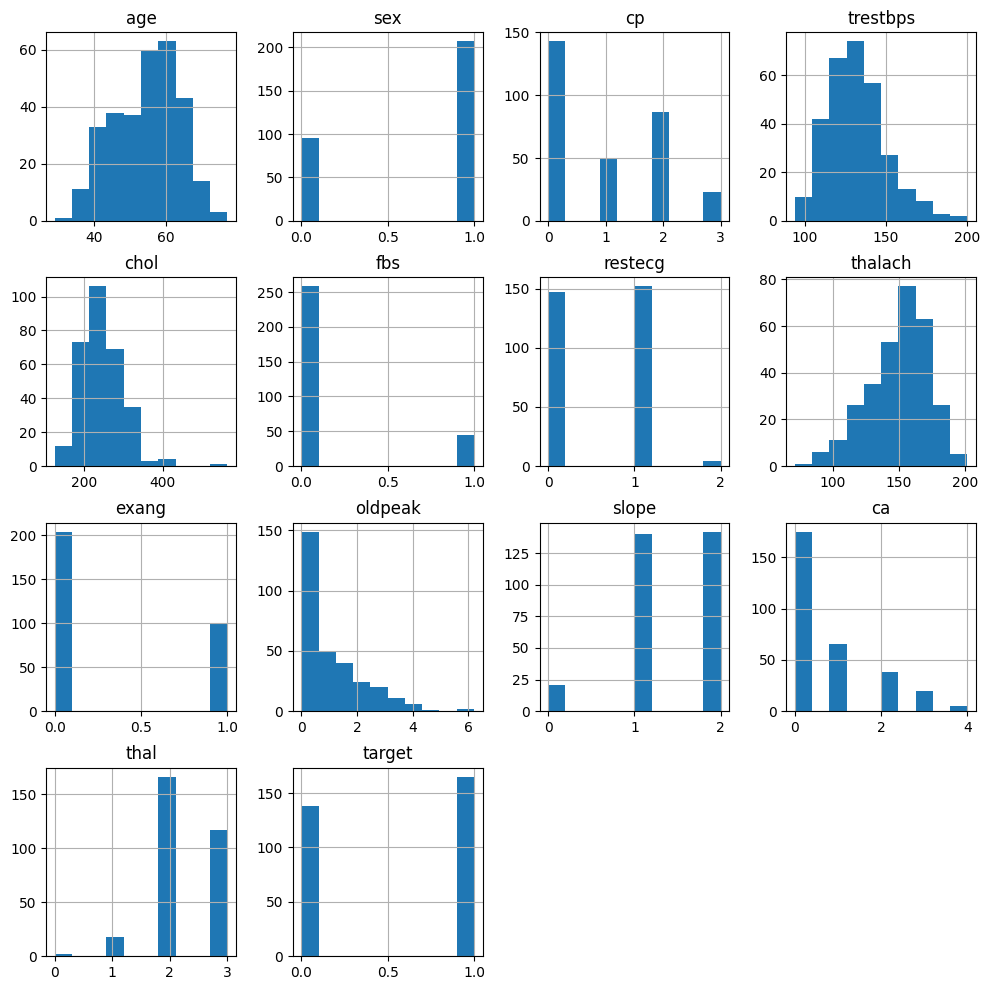

In [55]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

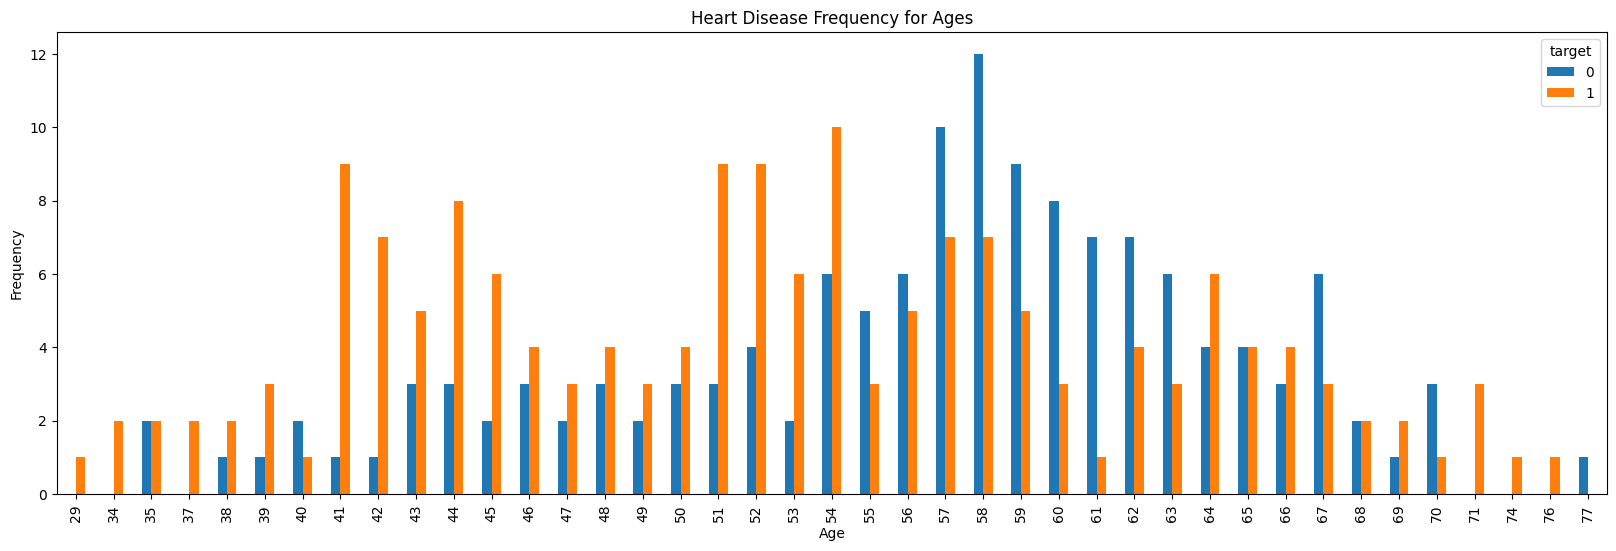

In [56]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

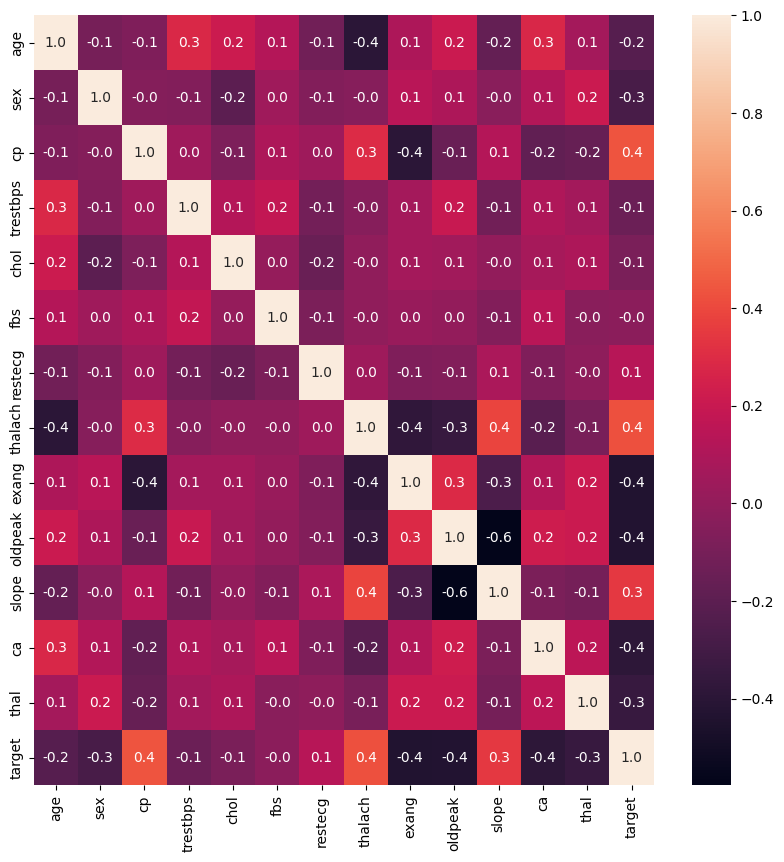

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

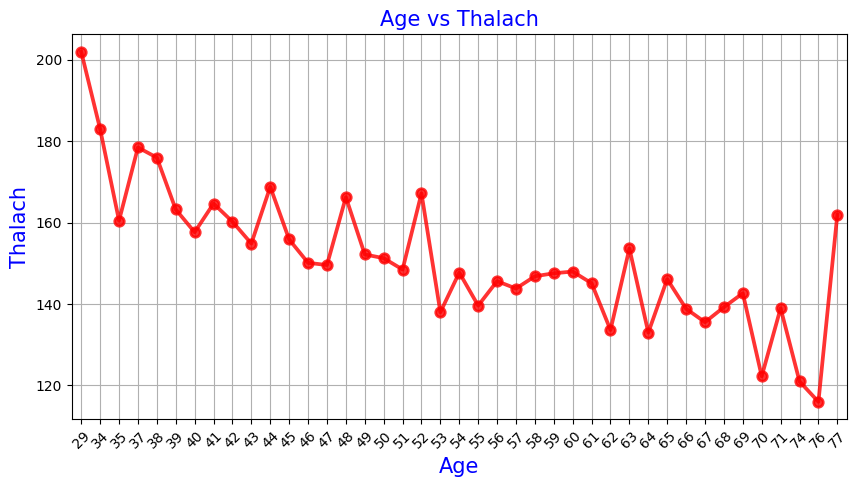

In [58]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

<a class="anchor" id="2."></a>
# 2.Create Training and Testing Datasets

Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data).


In [59]:
X = np.array(data.drop(['target'], axis=1)) # Use axis=1 to specify that you want to drop a column
y = np.array(data['target'])

In [60]:
X[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [61]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [62]:
X[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [63]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [64]:
# convert the data to categorical labels
from keras.utils import to_categorical # import to_categorical from keras.utils

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [65]:
X_train[0]

array([ 1.61392956, -1.46841752,  1.97312292,  0.47839125, -0.14038081,
       -0.41763453,  0.89896224,  0.05917329, -0.69663055,  0.65599028,
        0.97635214,  1.24459328, -0.51292188])

<a class="anchor" id="3."></a>
# 3.Building and Training the Neural Network

Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [66]:
# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

    # compile model
    adam = Adam(learning_rate=0.001) # Changed 'lr' to 'learning_rate'
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                224       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 2)                 18        
                                                                 
Total params: 378 (1.48 KB)
Trainable params: 378 (1.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [67]:
# define a function to build the keras model
from tensorflow.keras.models import Sequential # import Sequential from tensorflow.keras.models
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

def create_model():
# create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers))

In [68]:
# fit the model to the training data
from tensorflow.keras.models import Sequential # import Sequential from tensorflow.keras.models
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

def create_model():
# create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

    # compile model
    adam = Adam(learning_rate=0.001) # Changed 'lr' to 'learning_rate'
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model() # defines model

history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
25/25 [==============================] - 2s 23ms/step - loss: 0.6873 - accuracy: 0.5744 - val_loss: 0.6768 - val_accuracy: 0.5410
Epoch 2/50
25/25 [==============================] - 0s 11ms/step - loss: 0.6655 - accuracy: 0.5909 - val_loss: 0.6526 - val_accuracy: 0.6721
Epoch 3/50
25/25 [==============================] - 0s 11ms/step - loss: 0.6280 - accuracy: 0.7273 - val_loss: 0.6149 - val_accuracy: 0.7869
Epoch 4/50
25/25 [==============================] - 0s 11ms/step - loss: 0.6023 - accuracy: 0.7934 - val_loss: 0.5811 - val_accuracy: 0.7869
Epoch 5/50
25/25 [==============================] - 0s 10ms/step - loss: 0.5577 - accuracy: 0.8140 - val_loss: 0.5404 - val_accuracy: 0.8033
Epoch 6/50
25/25 [==============================] - 0s 11ms/step - loss: 0.5225 - accuracy: 0.7975 - val_loss: 0.5038 - val_accuracy: 0.8197
Epoch 7/50
25/25 [==============================] - 0s 9ms/step - loss: 0.4685 - accuracy: 0.8512 - val_loss: 0.4738 - val_accuracy: 0.8361
Epoch 8/50
25/

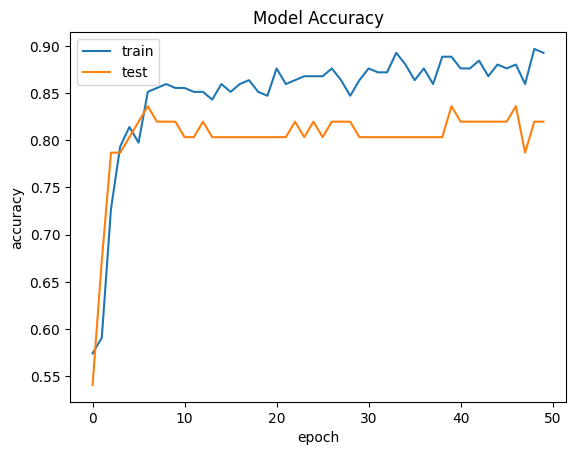

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy']) # Changed 'acc' to 'accuracy'
plt.plot(history.history['val_accuracy']) # Changed 'val_acc' to 'val_accuracy'
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

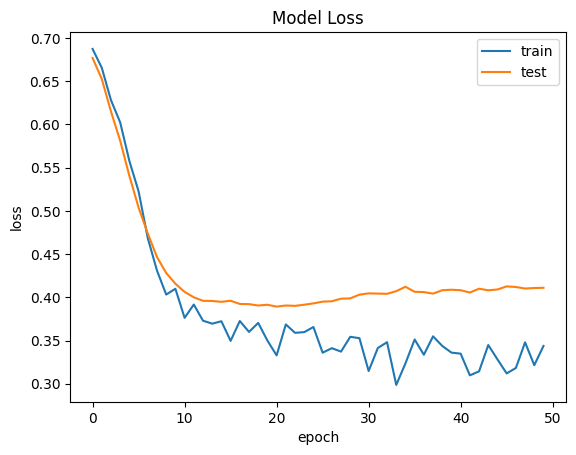

In [70]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

<a class="anchor" id="4."></a>
# 4.Improving Results - A Binary Classification Problem

Although we achieved promising results, we still have a fairly large error. This could be because it is very difficult to distinguish between the different severity levels of heart disease (classes 1 - 4). Let's simplify the problem by converting the data to a binary classification problem - heart disease or no heart disease.

In [71]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]


In [72]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(learning_rate=0.001) # Changed 'lr' to 'learning_rate'
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                224       
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dropout_13 (Dropout)        (None, 8)                 0         
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [73]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
25/25 [==============================] - 2s 30ms/step - loss: 0.6883 - accuracy: 0.6446 - val_loss: 0.6854 - val_accuracy: 0.6721
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.7603 - val_loss: 0.6706 - val_accuracy: 0.7213
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.7975 - val_loss: 0.6496 - val_accuracy: 0.7213
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6165 - accuracy: 0.7934 - val_loss: 0.6209 - val_accuracy: 0.7541
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 0.5972 - accuracy: 0.8182 - val_loss: 0.5900 - val_accuracy: 0.7869
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5563 - accuracy: 0.8223 - val_loss: 0.5573 - val_accuracy: 0.8033
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5169 - accuracy: 0.8388 - val_loss: 0.5223 - val_accuracy: 0.8197
Epoch 8/50
25/25 [=

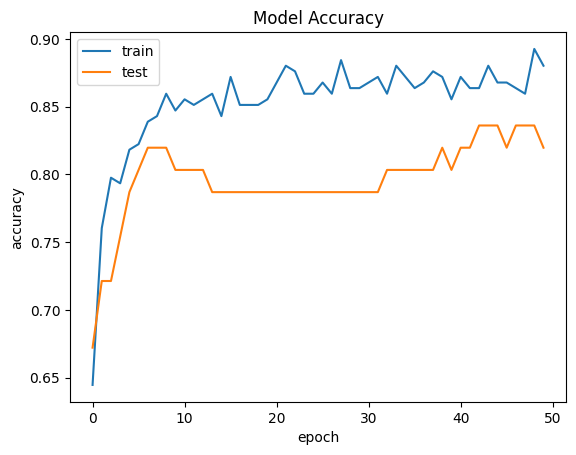

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy']) # Changed 'acc' to 'accuracy'
plt.plot(history.history['val_accuracy']) # Changed 'val_acc' to 'val_accuracy'
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

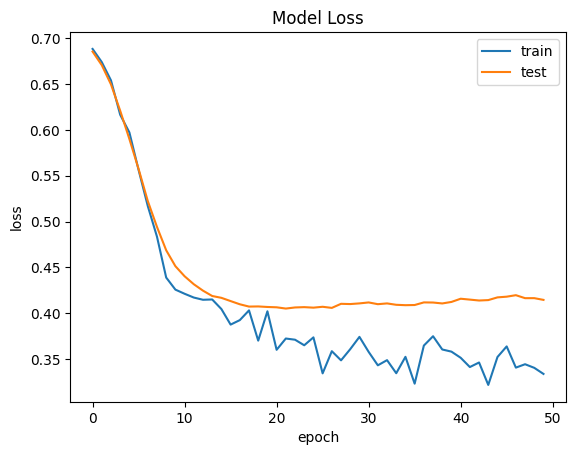

In [75]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

<a class="anchor" id="5."></a>
# 5.Results and Metrics

The accuracy results we have been seeing are for the training data, but what about the testing dataset? If our model's cannot generalize to data that wasn't used to train them, they won't provide any utility.

Let's test the performance of both our categorical model and binary model.  To do this, we will make predictions on the training dataset and calculate performance metrics using Sklearn.

In [76]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 [==============================] - 0s 6ms/step
Results for Categorical Model
0.819672131147541
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



In [77]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 [==============================] - 0s 6ms/step
Results for Binary Model
0.819672131147541
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

